In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
credit = pd.read_csv('./data/credit.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [5]:
credit

,id,limit_balance,gender,education,marriage,age,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [6]:
credit.shape

(30000, 25)

In [7]:
credit.dtypes

id                 int64
limit_balance    float64
gender             int64
education          int64
marriage           int64
age                int64
payment_1          int64
payment_2          int64
payment_3          int64
payment_4          int64
payment_5          int64
payment_6          int64
bill_amt1        float64
bill_amt2        float64
bill_amt3        float64
bill_amt4        float64
bill_amt5        float64
bill_amt6        float64
pay_amt1         float64
pay_amt2         float64
pay_amt3         float64
pay_amt4         float64
pay_amt5         float64
pay_amt6         float64
default            int64
dtype: object

In [8]:
credit.duplicated().sum()

0

In [9]:
credit.isna().sum()

id               0
limit_balance    0
gender           0
education        0
marriage         0
age              0
payment_1        0
payment_2        0
payment_3        0
payment_4        0
payment_5        0
payment_6        0
bill_amt1        0
bill_amt2        0
bill_amt3        0
bill_amt4        0
bill_amt5        0
bill_amt6        0
pay_amt1         0
pay_amt2         0
pay_amt3         0
pay_amt4         0
pay_amt5         0
pay_amt6         0
default          0
dtype: int64

In [10]:
defaulting_distribution = credit["default"].value_counts()
defaulting_distribution

default
0    23364
1     6636
Name: count, dtype: int64

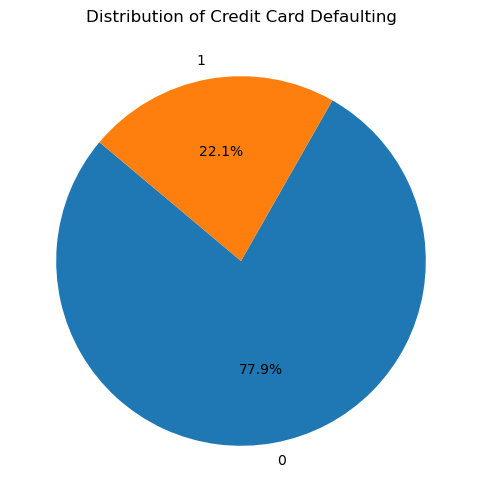

In [11]:
plt.figure(figsize=(8, 6))
plt.pie(defaulting_distribution.values, labels=defaulting_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Credit Card Defaulting')
plt.show()

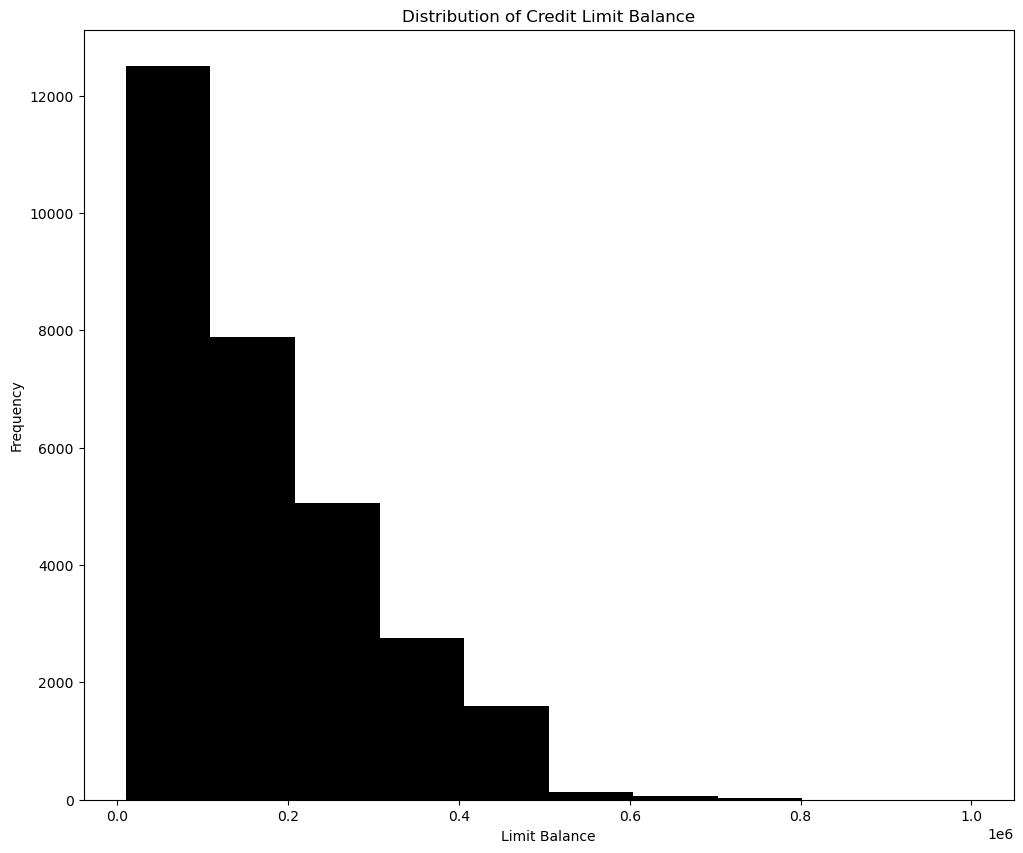

In [12]:
#Distribution of Credit
plt.figure(figsize=(12, 10))
plt.hist(credit["limit_balance"], color='black')
plt.title('Distribution of Credit Limit Balance')
plt.xlabel('Limit Balance')
plt.ylabel('Frequency')
plt.show()

In [13]:
credit[["education", "default"]].corr(numeric_only=True)

,education,default
education,1.000000,0.028006
default,0.028006,1.000000


In [14]:
credit.corr(numeric_only=True)

,id,limit_balance,gender,education,marriage,age,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
id,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
limit_balance,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
gender,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
education,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
marriage,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
age,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
payment_1,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
payment_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
payment_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
payment_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


In [15]:
credit[["gender", "default"]].value_counts()

gender  default
2       0          14349
1       0           9015
2       1           3763
1       1           2873
Name: count, dtype: int64

In [16]:
credit

,id,limit_balance,gender,education,marriage,age,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [17]:
credit[credit["payment_1"] > 0].value_counts()

id     limit_balance  gender  education  marriage  age  payment_1  payment_2  payment_3  payment_4  payment_5  payment_6  bill_amt1  bill_amt2  bill_amt3  bill_amt4  bill_amt5  bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  default
1      20000.0        2       2          1         24   2           2         -1         -1         -2         -2          3913.0    3102.0     689.0      0.0        0.0        0.0        0.0       689.0     0.0       0.0       0.0       0.0       1          1
18948  290000.0       2       2          1         32   1           2          0          0          0          0          146853.0  139756.0   136012.0   136466.0   136929.0   132179.0   1503.0    5400.0    5200.0    5000.0    4667.0    5000.0    0          1
18941  150000.0       2       1          2         28   1          -1         -1         -1         -1          0         -89.0      13894.0    24782.0    1927.0     8200.0     3867.0     13983.0   24831.0   2358.0    8210

In [18]:
credit[(credit["payment_1"] > 0) & (credit["gender"] == 1)]

,id,limit_balance,gender,education,marriage,age,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
13,14,70000.0,1,2,2,30,1,2,2,0,0,2,65802.0,67369.0,65701.0,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1
26,27,60000.0,1,1,2,27,1,-2,-1,-1,-1,-1,-109.0,-425.0,259.0,-57.0,127.0,-189.0,0.0,1000.0,0.0,500.0,0.0,1000.0,1
31,32,50000.0,1,2,2,33,2,0,0,0,0,0,30518.0,29618.0,22102.0,22734.0,23217.0,23680.0,1718.0,1500.0,1000.0,1000.0,1000.0,716.0,1
38,39,50000.0,1,1,2,25,1,-1,-1,-2,-2,-2,0.0,780.0,0.0,0.0,0.0,0.0,780.0,0.0,0.0,0.0,0.0,0.0,1
50,51,70000.0,1,3,2,42,1,2,2,2,2,0,37042.0,36171.0,38355.0,39423.0,38659.0,39362.0,0.0,3100.0,2000.0,0.0,1500.0,1500.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29981,29982,50000.0,1,2,1,44,1,2,2,2,0,0,38671.0,36772.0,33101.0,28192.0,22676.0,14647.0,2300.0,1700.0,0.0,517.0,503.0,585.0,0
29991,29992,210000.0,1,2,1,34,3,2,2,2,2,2,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29994,29995,80000.0,1,2,2,34,2,2,2,2,2,2,72557.0,77708.0,79384.0,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


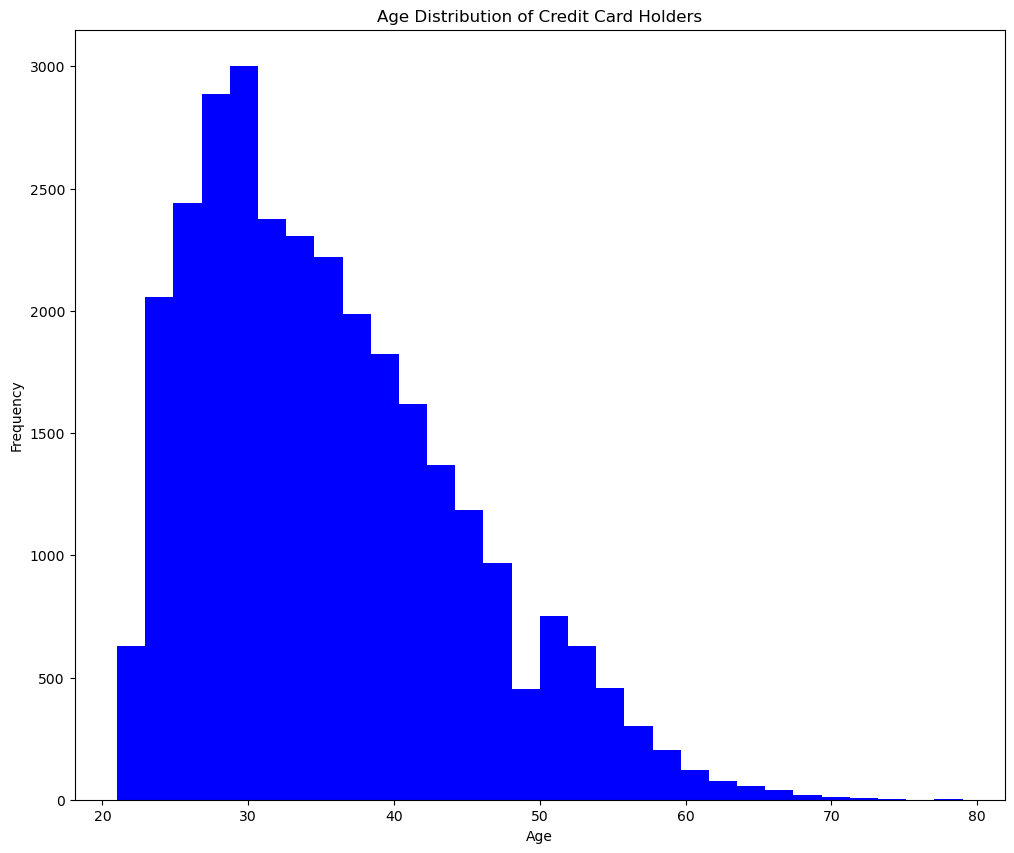

In [19]:
#Age Distribution
plt.figure(figsize=(12, 10))
plt.hist(credit["age"], color='blue', bins=30)
plt.title('Age Distribution of Credit Card Holders')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

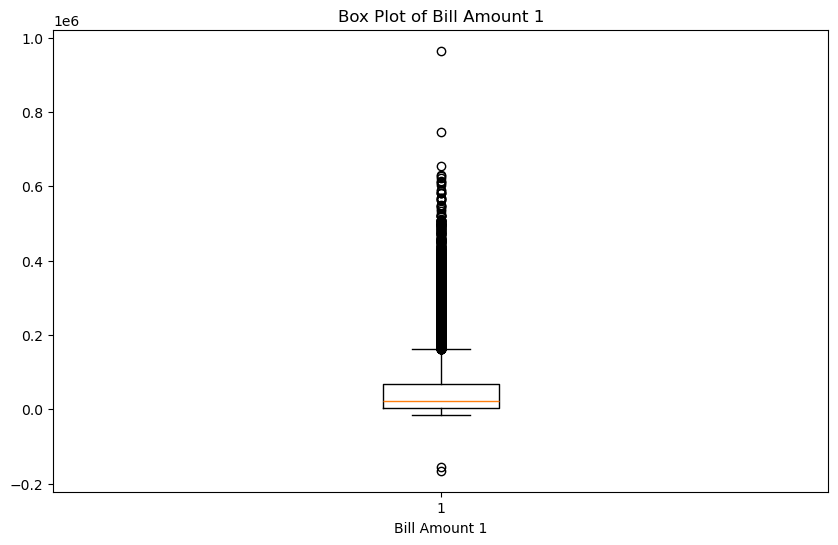

In [20]:
#Box plot for Bill Amount
plt.figure(figsize=(10, 6))
plt.boxplot(credit["bill_amt1"])
plt.title('Box Plot of Bill Amount 1')
plt.xlabel('Bill Amount 1')
plt.show()

In [21]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30000 non-null  int64  
 1   limit_balance  30000 non-null  float64
 2   gender         30000 non-null  int64  
 3   education      30000 non-null  int64  
 4   marriage       30000 non-null  int64  
 5   age            30000 non-null  int64  
 6   payment_1      30000 non-null  int64  
 7   payment_2      30000 non-null  int64  
 8   payment_3      30000 non-null  int64  
 9   payment_4      30000 non-null  int64  
 10  payment_5      30000 non-null  int64  
 11  payment_6      30000 non-null  int64  
 12  bill_amt1      30000 non-null  float64
 13  bill_amt2      30000 non-null  float64
 14  bill_amt3      30000 non-null  float64
 15  bill_amt4      30000 non-null  float64
 16  bill_amt5      30000 non-null  float64
 17  bill_amt6      30000 non-null  float64
 18  pay_am

In [22]:
credit.groupby("default")["limit_balance"].mean()

default
0    178099.726074
1    130109.656420
Name: limit_balance, dtype: float64

In [23]:
credit["age"].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74], dtype=int64)

In [24]:
credit["age_class"] = credit["age"].apply(lambda x: "Young" if x < 40 else "Old" if x < 60  else "Elder")

In [25]:
credit["age_class"]

0        Young
1        Young
2        Young
3        Young
4          Old
         ...  
29995    Young
29996      Old
29997    Young
29998      Old
29999      Old
Name: age_class, Length: 30000, dtype: object

In [32]:
defaulting_by_age = credit.groupby("age_class")["default"].value_counts()
defaulting_by_age

age_class  default
Elder      0            243
           1             96
Old        0           6738
           1           2067
Young      0          16383
           1           4473
Name: count, dtype: int64

In [35]:
defaulting_by_gender = credit.groupby("gender")["default"].value_counts()
defaulting_by_gender

gender  default
1       0           9015
        1           2873
2       0          14349
        1           3763
Name: count, dtype: int64

In [36]:
credit

,id,limit_balance,gender,education,marriage,age,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,age_class
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,Young
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,Young
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,Young
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,Young
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,Young
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,Old
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,Young
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,Old


In [38]:
defaulting_by_education = credit.groupby("education")["default"].value_counts()
defaulting_by_education

education  default
0          0             14
1          0           8549
           1           2036
2          0          10700
           1           3330
3          0           3680
           1           1237
4          0            116
           1              7
5          0            262
           1             18
6          0             43
           1              8
Name: count, dtype: int64

In [44]:
pd.set_option('display.max_rows', None)
credit.groupby(["payment_1", "payment_2", "payment_3", "payment_4", "payment_5", "payment_6"])["default"].value_counts()

payment_1  payment_2  payment_3  payment_4  payment_5  payment_6  default
-2         -2         -2         -2         -2         -2         0          1825
                                                                  1           284
                                                       -1         0            71
                                                                  1            17
                                            -1         -1         0            40
                                                                  1             9
                                                        0         0            26
                                                                  1             2
                                                        2         0             7
                                                                  1             1
                                             0         -1         0             1
                        

In [47]:
credit[["limit_balance", "bill_amt1", "bill_amt2", "bill_amt3", "bill_amt4", "bill_amt5", "bill_amt6"]].corr()

,limit_balance,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
limit_balance,1.000000,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389
bill_amt1,0.285430,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650
bill_amt2,0.278314,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594
bill_amt3,0.283236,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320
bill_amt4,0.293988,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941
bill_amt5,0.295562,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197
bill_amt6,0.290389,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000


In [49]:
credit["limit_balance"].min()

10000.0

In [50]:
credit["limit_class"] = credit["limit_balance"].apply(lambda x: "Bronze" if x < 250000 else "Silver" if x <500000 else "Gold" if x < 750000 else "Platinum")

In [51]:
credit["limit_class"]

0          Bronze
1          Bronze
2          Bronze
3          Bronze
4          Bronze
5          Bronze
6            Gold
7          Bronze
8          Bronze
9          Bronze
10         Bronze
11         Silver
12           Gold
13         Bronze
14         Silver
15         Bronze
16         Bronze
17         Silver
18         Silver
19         Bronze
20         Bronze
21         Bronze
22         Bronze
23         Silver
24         Bronze
25         Bronze
26         Bronze
27         Bronze
28         Bronze
29         Bronze
30         Bronze
31         Bronze
32         Bronze
33           Gold
34           Gold
35         Bronze
36         Silver
37         Bronze
38         Bronze
39         Silver
40         Silver
41         Bronze
42         Bronze
43         Bronze
44         Bronze
45         Bronze
46         Bronze
47         Bronze
48         Silver
49         Bronze
50         Bronze
51         Bronze
52         Silver
53         Bronze
54         Bronze
55        

In [52]:
credit.groupby("limit_class")["default"].value_counts()

limit_class  default
Bronze       0          17285
             1           5648
Gold         0            814
             1            104
Platinum     0             10
Silver       0           5255
             1            884
Name: count, dtype: int64

In [55]:
pd.set_option('display.max_rows', None)
credit.groupby(["education", "marriage"])["default"].value_counts()

education  marriage  default
0          1         0             4
           2         0            10
1          0         0             4
           1         0          2953
                     1           769
           2         0          5555
                     1          1254
           3         0            37
                     1            13
2          0         0             5
                     1             1
           1         0          5176
                     1          1666
           2         0          5401
                     1          1619
           3         0           118
                     1            44
3          0         0            40
                     1             4
           1         0          2107
                     1           754
           2         0          1457
                     1           452
           3         0            76
                     1            27
4          1         0            49
         

In [58]:
correlation_matrix = credit.corr(numeric_only=True)
correlation_matrix

,id,limit_balance,gender,education,marriage,age,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
id,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
limit_balance,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
gender,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
education,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
marriage,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
age,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
payment_1,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
payment_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
payment_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
payment_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


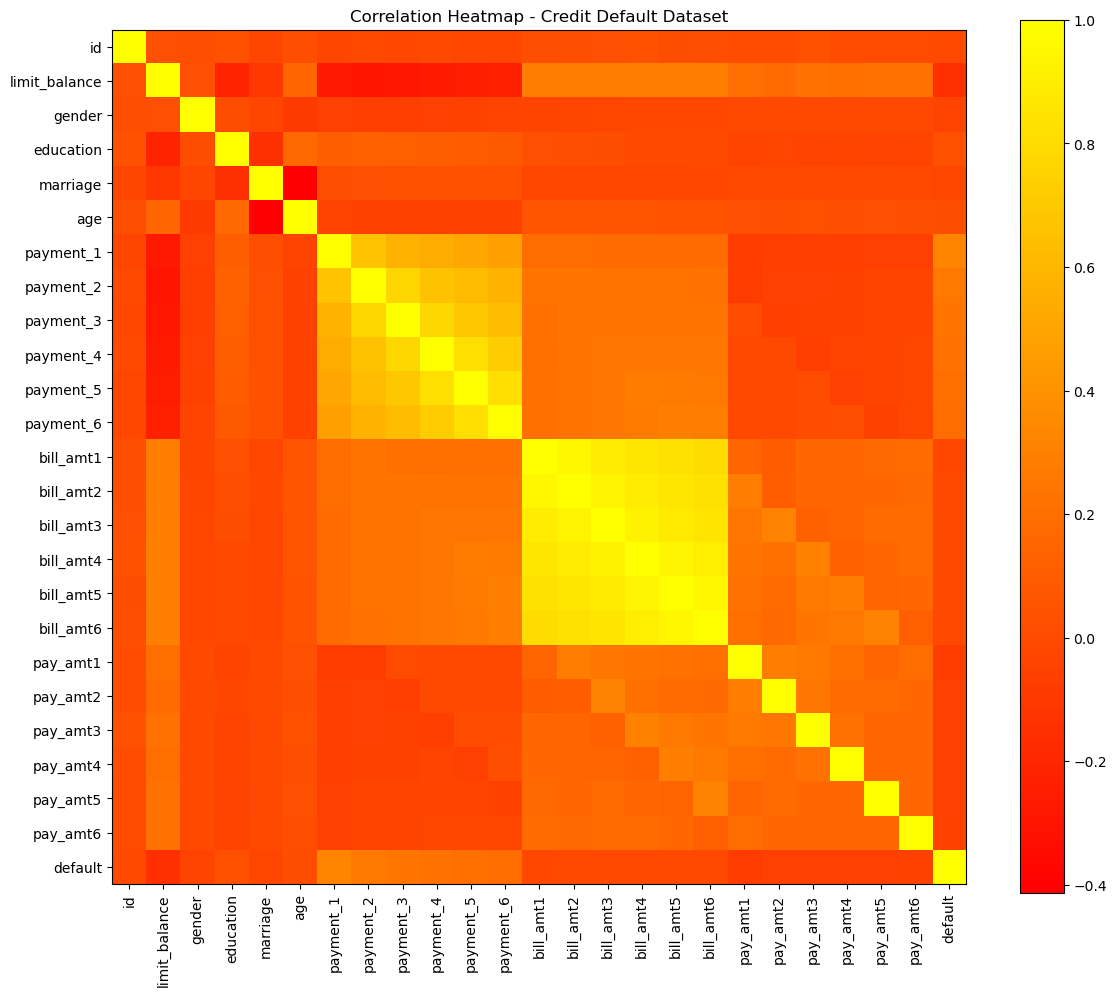

In [62]:
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap="autumn", interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Heatmap - Credit Default Dataset")
plt.tight_layout()
plt.show()

In [63]:
credit.to_csv("./data/credit.csv", index=False)